In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder

In [51]:
df = pd.read_csv('train.csv')

In [52]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df.drop(columns =['Cabin'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [56]:
## fixing null values in Age
median_age = df['Age'].median()
new_df = df
new_df['Age'] = new_df['Age'].fillna(median_age)
new_df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [57]:
#dropping null columns in embarked
new_df.dropna(axis =0,inplace = True)
new_df.info()
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [59]:
new_df.drop(columns =['Ticket'], inplace = True)
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [60]:
new_df['Embarked'].unique()
#S = Southampton
#C = Cherbourg
#Q = Queenstown

array(['S', 'C', 'Q'], dtype=object)

In [61]:
#one hot encoding for embarked
one_hot = pd.get_dummies(new_df['Embarked'])
new_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [62]:
new_df = pd.concat([new_df, one_hot], axis=1)

In [63]:
new_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,False,True


In [64]:
#converting sex using encoding
le = LabelEncoder()
new_df['sex_label'] = le.fit_transform(new_df['Sex'])

#1 ->male   0 -> female
new_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,False,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,False,False,True,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,False,True,1


In [16]:
new_df.drop(columns =['Name'], inplace = True)


In [65]:
new_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,False,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,False,False,True,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,False,True,1


<Axes: >

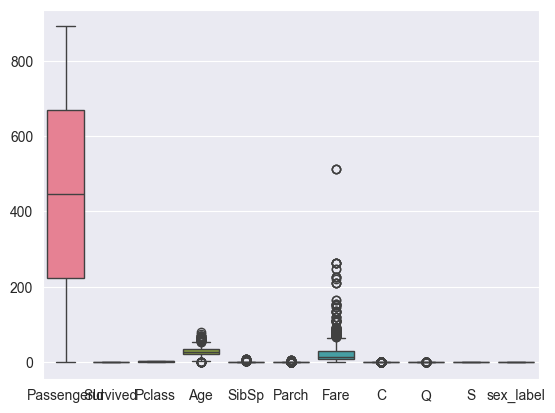

In [66]:
sns.boxplot(data = new_df)

In [117]:
#more outlier detection
Q1 = new_df['Fare'].quantile(0.25)
Q3 = new_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = new_df[(new_df['Fare'] < (Q1 - 1.5 * IQR)) | (new_df['Fare'] > (Q3 + 1.5 * IQR))]
outliers.shape


(114, 16)

In [118]:
#group by
new_df.groupby('Sex')['Survived'].mean()


Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [67]:
new_df.duplicated().sum()               #no duplicates

0

In [68]:
new_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
C              0
Q              0
S              0
sex_label      0
dtype: int64

In [69]:
new_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,False,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,False,False,True,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,False,True,1


In [82]:
#Feature Engineering
new_df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  C            889 non-null    bool   
 11  Q            889 non-null    bool   
 12  S            889 non-null    bool   
 13  sex_label    889 non-null    int32  
 14  Family_Size  889 non-null    int64  
dtypes: bool(3), float64(2), int32(1), int64(6), object(3)
memory usage: 89.4+ KB


In [85]:
new_df["Alone"] = np.where(new_df["Family_Size"] == 1,1,0)

In [70]:
#now starting the visualization
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.315152,12.984932,0.42,22.0000,28.0000,35.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292
sex_label,889.0,0.649044,0.477538,0.00,0.0000,1.0000,1.0,1.0000


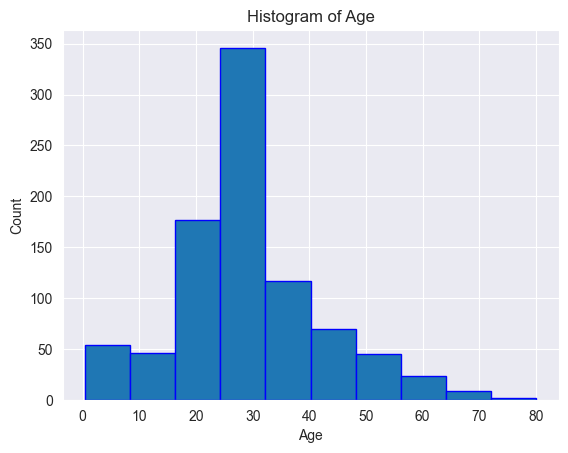

In [71]:
new_df['Age'].hist(bins = 10 , edgecolor = 'blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

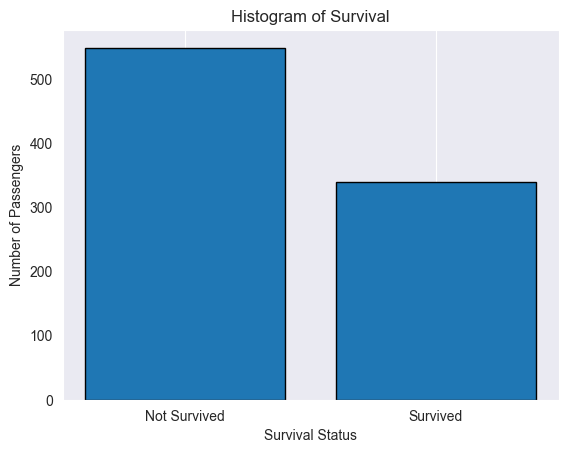

In [72]:
plt.hist(new_df['Survived'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Histogram of Survival')
plt.grid(axis='y')
plt.show()

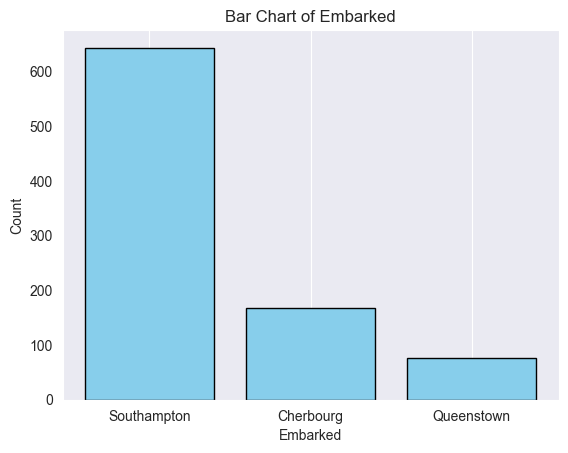

In [74]:
embarked_counts = new_df['Embarked'].value_counts()

plt.bar(embarked_counts.index, embarked_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Bar Chart of Embarked')
plt.grid(axis='y')
plt.xticks(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()


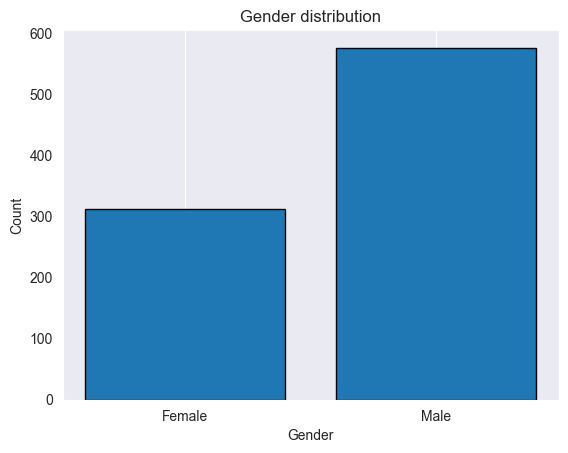

In [76]:
plt.hist(new_df['sex_label'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

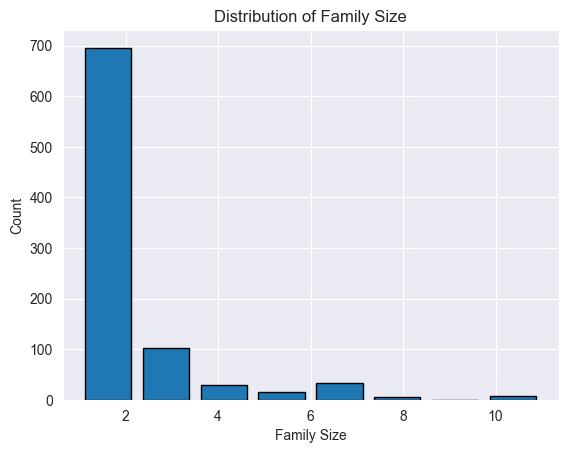

In [89]:
plt.hist(new_df['Family_Size'],bins = 8, edgecolor='black', rwidth=0.8)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')

plt.show()

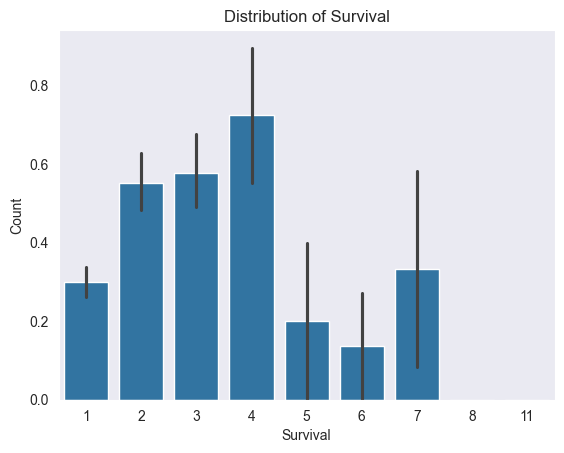

In [92]:
#Bi - Variant Analysis
#familySize vs survived
sns.barplot(data = new_df, x = 'Family_Size', y = 'Survived')
plt.title('Distribution of Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

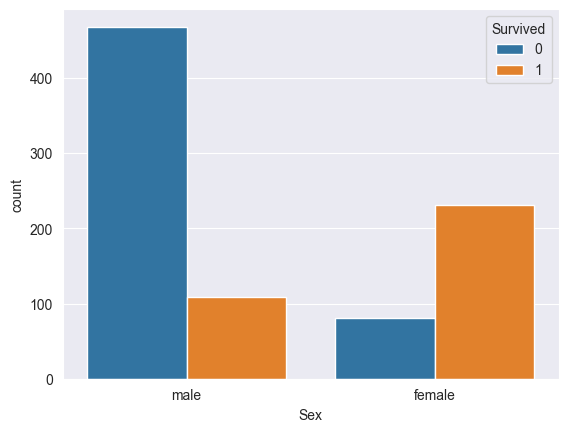

In [100]:
sns.countplot(data=new_df, x='Sex', hue='Survived')
plt.show()


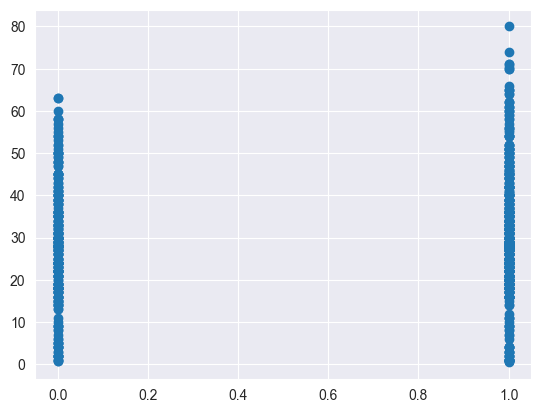

In [110]:
plt.scatter( new_df['Survived'],new_df['Age'] )
plt.show()

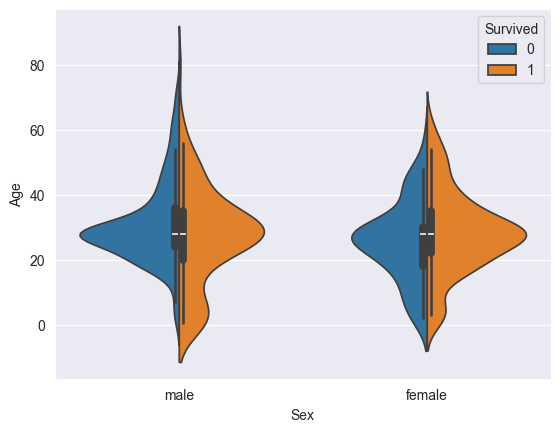

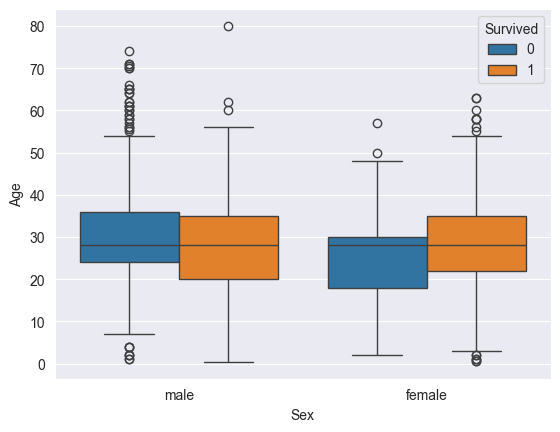

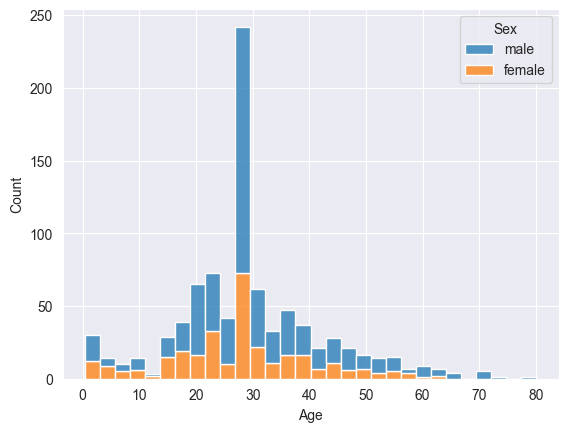

In [114]:
sns.violinplot(data=new_df, x='Sex', y='Age', hue='Survived', split=True)
plt.show()
sns.boxplot(data=new_df, x='Sex', y='Age', hue='Survived')
plt.show()
sns.histplot(data=new_df, x='Age', hue='Sex', multiple='stack')
plt.show()

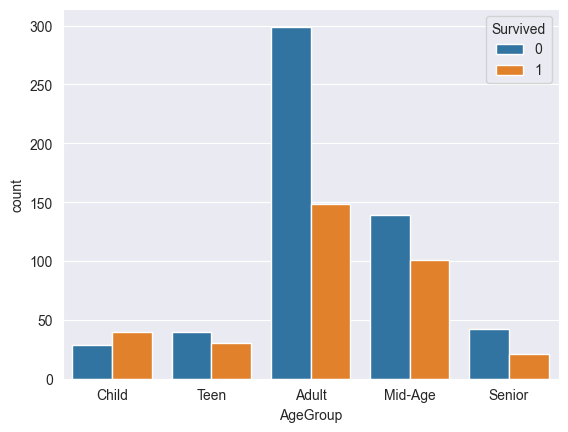

In [119]:
new_df['AgeGroup'] = pd.cut(new_df['Age'], bins=[0, 12, 18, 30, 50, 80],
                            labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])
sns.countplot(data=new_df, x='AgeGroup', hue='Survived')
plt.show()


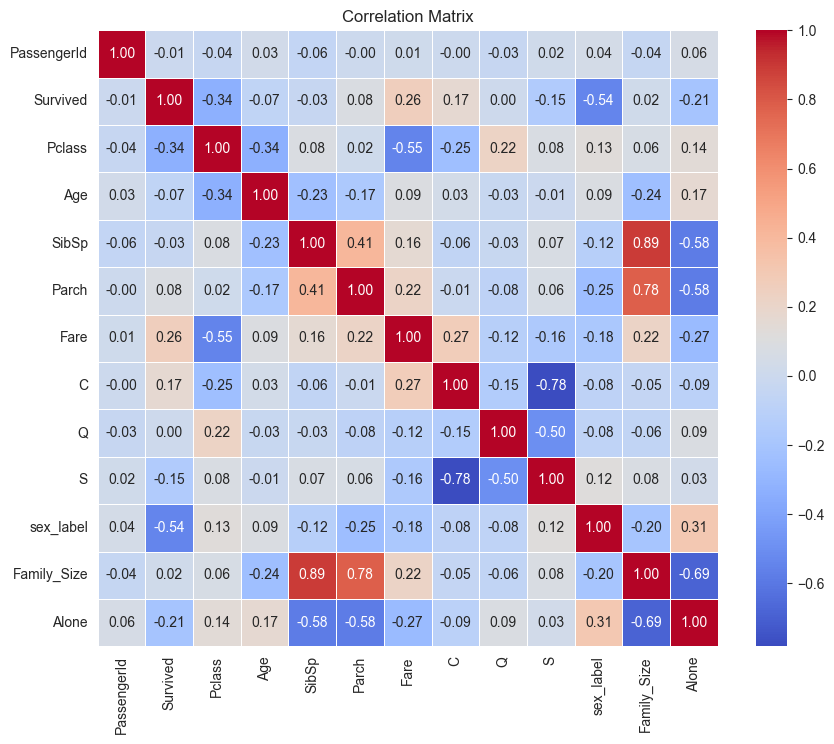

In [115]:
corr_matrix = new_df.corr(numeric_only=True)  # Use numeric_only if dataframe has categorical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


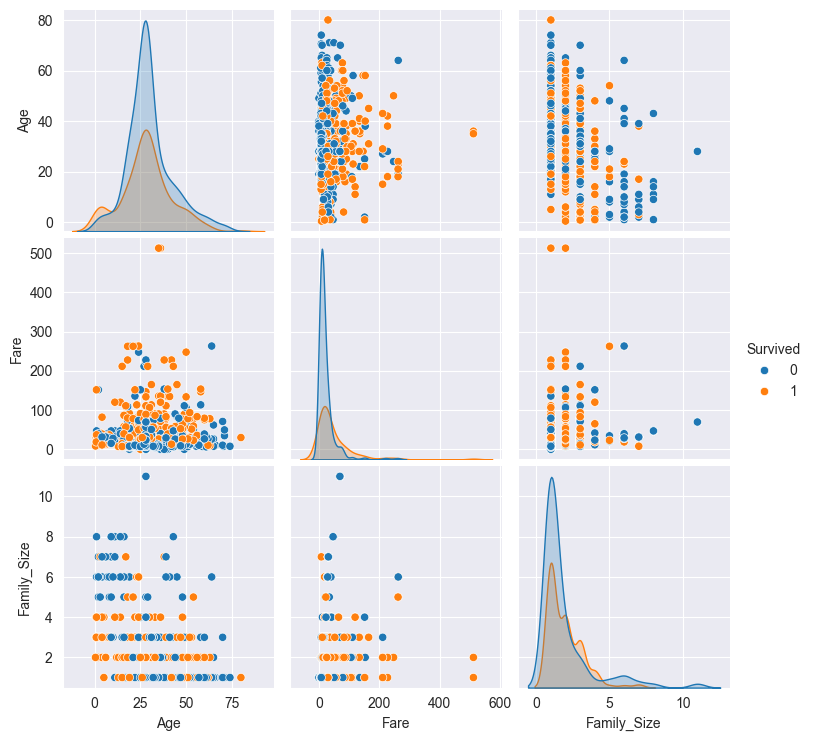

In [116]:
sns.pairplot(new_df[['Age', 'Fare', 'Survived', 'Family_Size']], hue='Survived')
plt.show()
